**Dataset Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline

In [ ]:
import zipfile
import requests
import os
from pathlib import Path

# Define the URL of the file you want to download
url = "https://data.humdata.org/dataset/019de7ad-8043-4755-b1fb-f84ce4b961a5/resource/9865aa90-d0a4-4d78-845d-3fffa67be0be/download/ukraine-2023-hno-pin-and-severity-for-hdx-20230215.xlsx"
url_conflicts = "https://data.humdata.org/dataset/7b36830b-c033-4a06-b812-9940baec603b/resource/e122ca1c-9463-4e3a-8731-8a85fab2a15e/download/ukraine_hrp_political_violence_events_and_fatalities_by_month-year_as-of-18oct2023.xlsx"

resp = requests.get(url)
with open('test.xls', 'wb') as output:
    output.write(resp.content)

resp_conflicts = requests.get(url_conflicts)
with open('test_conflicts.xls', 'wb') as output:
    output.write(resp_conflicts.content)

In [ ]:
# HNO 2023
hno2023_cluster = pd.read_excel(open('test.xls', 'rb'),sheet_name='Cluster PIN By Oblast')
hno2023_severity = pd.read_excel(open('test.xls', 'rb'),sheet_name='Severity by Raion {<> ED WA}')
hno2023_overall =  pd.read_excel(open('test.xls', 'rb'),sheet_name='Overall Affected PIN By Oblast')

# Ukraine Conflict Events
conflict_events = pd.read_excel(open('test_conflicts.xls', 'rb'),sheet_name='Data')

# Ukraine: Humanitarian Needs Overview

**Dataset 1: Ukraine 2023 HNO PIN and Severity for HDX 20230215.xlsx**

**Data Overview**

In [ ]:
hno2023_cluster.head(10)

,UKRAINE 2023 Humanitarain Needs Overview,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,PIN Estimates by Cluster and Oblast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Geography,NaN,NaN,Baseline,Affected,Overall PIN by Cluster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Overall PIN
3,Oblast [EN],Oblast [UK],Oblast PCode,Population Estimate,Total,CCCM,Education,Food Security \n& Livelihoods,Health,General Protection,Child Protection,Gender-based Violence,Mine Action,Shelter \n& NFIs,WASH,Intersectoral
4,#admin1 +name +en,#admin1 +name +uk,#admin1 +code,#population,#affected,#inneed,#inneed,#inneed,#inneed,#inneed,#inneed,#inneed,#inneed,#inneed,#inneed,#inneed
5,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,0,0,0,0,0,0,0,0,0,0,0,0
6,Vinnytska,Вінницька,UA05,1502897.01127,742596.38241,22991,217106.445691,434788.097556,468772.586955,544177.720298,109893.563598,141946.681946,277500,222790.811132,213758.59078,544177.720298
7,Volynska,Волинська,UA07,1053028.377874,316455.658271,22957,174672.373705,246198.023574,198538.560145,205427.174521,45197.090503,52034.971756,68044,101745.41401,146523.292455,282378.0217
8,Dnipropetrovska,Дніпропетровська,UA12,2846031.525262,1521376.173724,26748,417189.417937,850394.365194,1108874.82461,755629.367742,246434.895695,250841.566131,857977,628845.801482,726167.560248,1108874.82461
9,Donetska,Донецька,UA14,3207607.403857,2519848.763581,12000,227344.371513,1150248.015781,1782643.691347,2374346.767625,411982.225601,457513.513014,1589696,1534737.89997,2388968.168879,2569405.008819


In [ ]:
hno2023_overall.head(10)

,UKRAINE 2023 Humanitarain Needs Overview,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Overall Affected and Intersectoral PIN Estimat...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Geography,NaN,NaN,Baseline,Affected,Overall PIN
3,Oblast [EN],Oblast [UK],Oblast PCode,Population Estimate,Total,Intersectoral
4,#admin1 +name +en,#admin1 +name +uk,#admin1 +code,#population,#affected,#inneed
5,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,0,0,0
6,Vinnytska,Вінницька,UA05,1502897.01127,742596.38241,544177.720298
7,Volynska,Волинська,UA07,1053028.377874,316455.658271,282378.0217
8,Dnipropetrovska,Дніпропетровська,UA12,2846031.525262,1521376.173724,1108874.82461
9,Donetska,Донецька,UA14,3207607.403857,2519848.763581,2569405.008819


In [ ]:
hno2023_severity.head(10)

,UKRAINE 2023 Humanitarain Needs Overview,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Severity of Needs by Cluster and Raion (Exclud...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Geography,NaN,NaN,NaN,NaN,NaN,Severity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Raion [EN],Raion [UK],Raion PCode,Oblast [EN],Oblast [UK],Oblast PCode,CCCM,Food Security \n& Livelihoods,Health,Protection,General Protection,Child Protection,Gender-based Violence,Mine Action,Shelter \n& NFIs,Intersectoral
4,#admin2 +name +en,#admin2 +name +uk,#admin2 +code,#admin1 +name +en,#admin1 +name +uk,#admin1 +code,#severity,#severity,#severity,#severity,#severity,#severity,#severity,#severity,#severity,#severity
5,Bakhchysaraiskyi,Бахчисарайський,UA0102,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Bilohirskyi,Білогірський,UA0104,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Dzhankoiskyi,Джанкойський,UA0106,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Yevpatoriiskyi,Євпаторійський,UA0108,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Kerchynskyi,Керченський,UA0110,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**While phrasing the excel sheet into the notebook, the dataset mis-formatted, which it requires part of data cleaning to get formatted datasets. In this cases, as shown in the dataset, the top several lines are unuseful**

**Dataset Reformatting**

In [ ]:
#hno2023_clsuter
columns = hno2023_cluster.iloc[3]
hno2023_cluster = hno2023_cluster.rename(columns=columns)
hno2023_cluster = hno2023_cluster.iloc[5:]
hno2023_cluster = hno2023_cluster.reset_index(drop=True)
hno2023_cluster.head()

,Oblast [EN],Oblast [UK],Oblast PCode,Population Estimate,Total,CCCM,Education,Food Security \n& Livelihoods,Health,General Protection,Child Protection,Gender-based Violence,Mine Action,Shelter \n& NFIs,WASH,Intersectoral
0,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,0,0,0,0,0,0,0,0,0,0,0,0
1,Vinnytska,Вінницька,UA05,1502897.01127,742596.38241,22991,217106.445691,434788.097556,468772.586955,544177.720298,109893.563598,141946.681946,277500,222790.811132,213758.59078,544177.720298
2,Volynska,Волинська,UA07,1053028.377874,316455.658271,22957,174672.373705,246198.023574,198538.560145,205427.174521,45197.090503,52034.971756,68044,101745.41401,146523.292455,282378.0217
3,Dnipropetrovska,Дніпропетровська,UA12,2846031.525262,1521376.173724,26748,417189.417937,850394.365194,1108874.82461,755629.367742,246434.895695,250841.566131,857977,628845.801482,726167.560248,1108874.82461
4,Donetska,Донецька,UA14,3207607.403857,2519848.763581,12000,227344.371513,1150248.015781,1782643.691347,2374346.767625,411982.225601,457513.513014,1589696,1534737.89997,2388968.168879,2569405.008819


In [ ]:
hno2023_cluster.shape

(27, 16)

In [ ]:
hno2023_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Oblast [EN]                   27 non-null     object
 1   Oblast [UK]                   27 non-null     object
 2   Oblast PCode                  27 non-null     object
 3   Population Estimate           25 non-null     object
 4   Total                         27 non-null     object
 5   CCCM                          27 non-null     object
 6   Education                     27 non-null     object
 7   Food Security 
& Livelihoods  27 non-null     object
 8   Health                        27 non-null     object
 9   General Protection            27 non-null     object
 10  Child Protection              27 non-null     object
 11  Gender-based Violence         27 non-null     object
 12  Mine Action                   27 non-null     object
 13  Shelter 
& NFIs       

In [ ]:
#hno2023_overall
columns = hno2023_overall.iloc[3]
hno2023_overall = hno2023_overall.rename(columns=columns)
hno2023_overall = hno2023_overall.iloc[5:]
hno2023_overall = hno2023_overall.reset_index(drop=True)
hno2023_overall.head()

,Oblast [EN],Oblast [UK],Oblast PCode,Population Estimate,Total,Intersectoral
0,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,0,0,0
1,Vinnytska,Вінницька,UA05,1502897.01127,742596.38241,544177.720298
2,Volynska,Волинська,UA07,1053028.377874,316455.658271,282378.0217
3,Dnipropetrovska,Дніпропетровська,UA12,2846031.525262,1521376.173724,1108874.82461
4,Donetska,Донецька,UA14,3207607.403857,2519848.763581,2569405.008819


In [ ]:
hno2023_overall.shape

(27, 6)

In [ ]:
hno2023_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Oblast [EN]           27 non-null     object
 1   Oblast [UK]           27 non-null     object
 2   Oblast PCode          27 non-null     object
 3   Population Estimate   27 non-null     object
 4   Total                 27 non-null     object
 5   Intersectoral         27 non-null     object
dtypes: object(6)
memory usage: 1.4+ KB


In [ ]:
#hno2023_severity
columns = hno2023_severity.iloc[3]
hno2023_severity = hno2023_severity.rename(columns=columns)
hno2023_severity = hno2023_severity.iloc[5:]
hno2023_severity = hno2023_severity.reset_index(drop=True)
hno2023_severity.head()

,Raion [EN],Raion [UK],Raion PCode,Oblast [EN],Oblast [UK],Oblast PCode,CCCM,Food Security \n& Livelihoods,Health,Protection,General Protection,Child Protection,Gender-based Violence,Mine Action,Shelter \n& NFIs,Intersectoral
0,Bakhchysaraiskyi,Бахчисарайський,UA0102,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bilohirskyi,Білогірський,UA0104,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dzhankoiskyi,Джанкойський,UA0106,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Yevpatoriiskyi,Євпаторійський,UA0108,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kerchynskyi,Керченський,UA0110,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
hno2023_severity.shape

(139, 16)

In [ ]:
hno2023_severity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Raion [EN]                    139 non-null    object
 1   Raion [UK]                    139 non-null    object
 2   Raion PCode                   139 non-null    object
 3   Oblast [EN]                   139 non-null    object
 4   Oblast [UK]                   139 non-null    object
 5   Oblast PCode                  139 non-null    object
 6   CCCM                          128 non-null    object
 7   Food Security 
& Livelihoods  128 non-null    object
 8   Health                        128 non-null    object
 9    Protection                   128 non-null    object
 10  General Protection            128 non-null    object
 11  Child Protection              128 non-null    object
 12  Gender-based Violence         127 non-null    object
 13  Mine Action         

**As shown in the dataset, there are some null values represented with 0, which it needs to be further addressed in the EDA part**

**Exploratory Data Analysis**

In [ ]:
# Handling missing values
hno2023_cluster.replace(0, np.nan, inplace=True)
hno2023_overall.replace(0, np.nan, inplace=True)

In [ ]:
hno2023_cluster.isnull().sum()

Oblast [EN]                      0
Oblast [UK]                      0
Oblast PCode                     0
Population Estimate              2
Total                            2
CCCM                             3
Education                        2
Food Security \n& Livelihoods    2
Health                           2
General Protection               2
Child Protection                 2
Gender-based Violence            2
Mine Action                      2
Shelter \n& NFIs                 2
WASH                             2
Intersectoral                    2
dtype: int64

In [ ]:
hno2023_overall.isnull().sum()

Oblast [EN]             0
Oblast [UK]             0
Oblast PCode            0
Population Estimate     2
Total                   2
Intersectoral           2
dtype: int64

In [ ]:
hno2023_severity.isnull().sum()

Raion [EN]                        0
Raion [UK]                        0
Raion PCode                       0
Oblast [EN]                       0
Oblast [UK]                       0
Oblast PCode                      0
CCCM                             11
Food Security \n& Livelihoods    11
Health                           11
 Protection                      11
General Protection               11
Child Protection                 11
Gender-based Violence            12
Mine Action                      11
Shelter \n& NFIs                 12
Intersectoral                    11
dtype: int64

In [ ]:
# Oblast/Raion Code
oblast_code= hno2023_cluster['Oblast PCode'].unique()
oblast_code

array(['UA01', 'UA05', 'UA07', 'UA12', 'UA14', 'UA18', 'UA21', 'UA23',
       'UA26', 'UA32', 'UA35', 'UA44', 'UA46', 'UA48', 'UA51', 'UA53',
       'UA56', 'UA59', 'UA61', 'UA63', 'UA65', 'UA68', 'UA71', 'UA73',
       'UA74', 'UA80', 'UA85'], dtype=object)

In [ ]:
# Cluster Name
cluster_name = hno2023_cluster.columns[5:-1]
cluster_name

Index(['CCCM', 'Education', 'Food Security \n& Livelihoods', 'Health',
       'General Protection', 'Child Protection', 'Gender-based Violence',
       'Mine Action', 'Shelter \n& NFIs', 'WASH'],
      dtype='object')

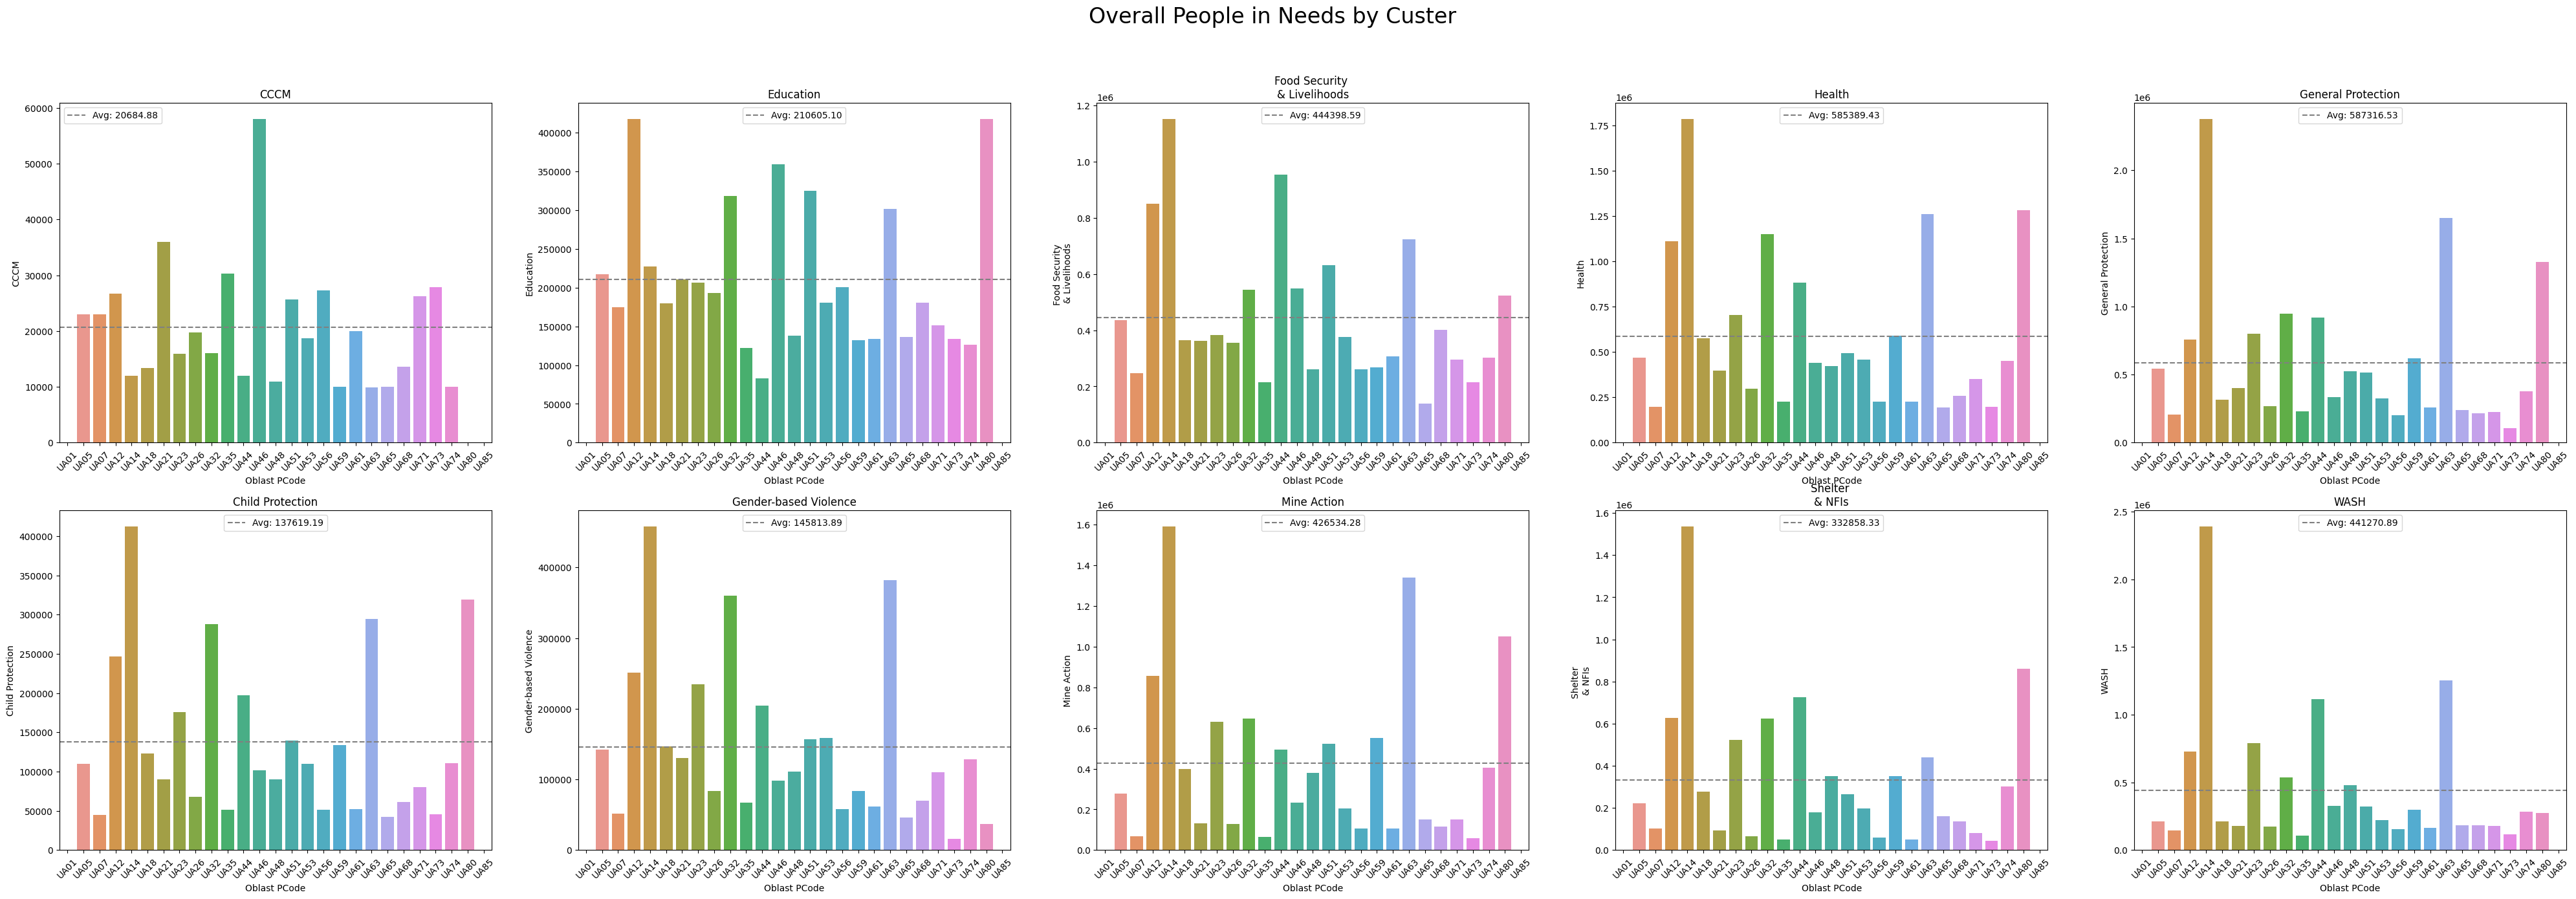

In [ ]:
# HNO2023 Cluster Population versus Oblast Region
num_rows = 2  # Number of rows
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 15))
for i, column in enumerate(cluster_name):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.barplot(data=hno2023_cluster, x='Oblast PCode', y=column, ax=ax)
    ax.set_title(f'{column}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    # showing the average of PIN in each cluster
    average = hno2023_cluster[column].mean()
    ax.axhline(y=average, color='grey', linestyle='--', label=f'Avg: {average:.2f}')
    ax.legend()

plt.suptitle('Overall People in Needs by Custer', fontsize=24)
plt.show()

[Text(0.5, 1.0, 'Cluster Correlation')]

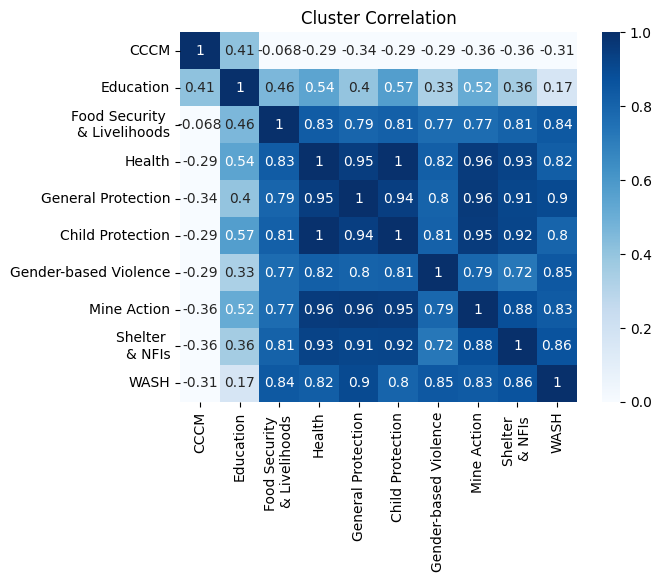

In [ ]:
clusterPIN = hno2023_cluster[cluster_name]
sns.heatmap(clusterPIN.corr(),cmap='Blues',vmin=0,vmax=1,annot = True).set(title='Cluster Correlation')

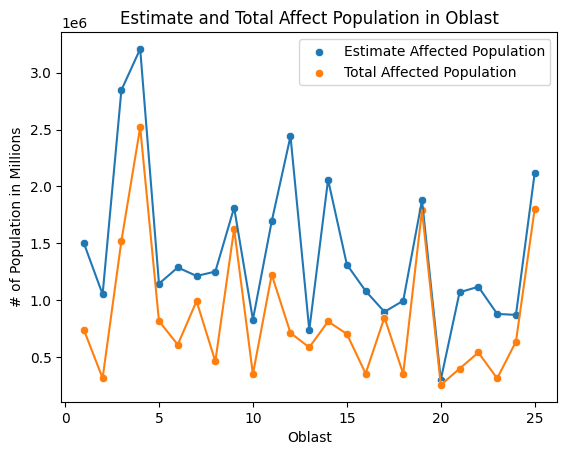

In [ ]:
# hno2023_overall
sns.scatterplot(hno2023_overall['Population Estimate '], label = 'Estimate Affected Population')
sns.lineplot(hno2023_overall['Population Estimate '])
sns.scatterplot(hno2023_overall['Total'], label = 'Total Affected Population')
sns.lineplot(hno2023_overall['Total'])
plt.title('Estimate and Total Affect Population in Oblast')
plt.ylabel('# of Population in Millions')
plt.xlabel('Oblast')
plt.legend()
plt.show()

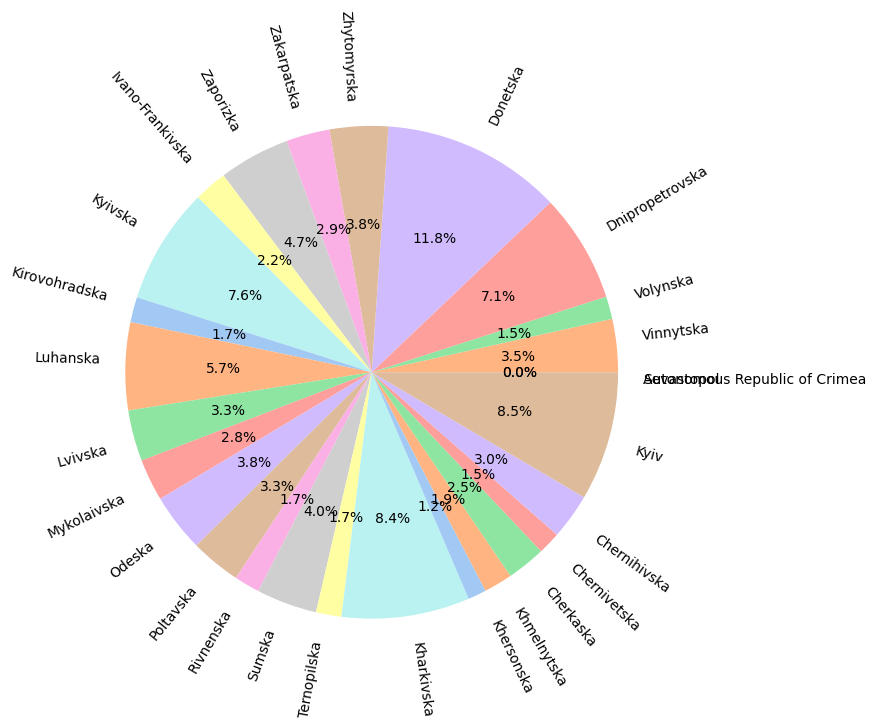

In [ ]:
labels = hno2023_overall['Oblast [EN]']
data = hno2023_overall['Total'].replace(np.nan,0)
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')
plt.pie(data, labels = labels, colors = colors, autopct='%.01f%%', rotatelabels= True)
plt.show()

**Dataset 6: UKR_HNO_2021**

# UKR_FA_April2022

In [ ]:
# Load the dataset
url = "https://data.humdata.org/dataset/019de7ad-8043-4755-b1fb-f84ce4b961a5/resource/27542466-1fdc-49cb-889a-9bb0392d0cb4/download/ukraine-flash-appeal_-april-revision-march-august-2022.xlsx"
df = pd.read_excel(url)

In [ ]:
df

,Oblast,Oblast Pcode,Total People in Need (PiN)
0,#adm1 +name,#adm1+code,#inneed +ind
1,Dnipropetrovska,UA12,681000
2,Donetska,UA14,2200000
3,Zaporizka,UA23,633000
4,Luhanska,UA44,1500000
5,Kharkivska,UA63,1500000
6,Mykolaivska,UA48,471000
7,Odeska,UA51,483000
8,Khersonska,UA65,766000
9,Ivano-Frankivska,UA26,280000


In [ ]:
df.head()


,Oblast,Oblast Pcode,Total People in Need (PiN)
0,#adm1 +name,#adm1+code,#inneed +ind
1,Dnipropetrovska,UA12,681000
2,Donetska,UA14,2200000
3,Zaporizka,UA23,633000
4,Luhanska,UA44,1500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Oblast                      26 non-null     object
 1   Oblast Pcode                26 non-null     object
 2   Total People in Need (PiN)  26 non-null     object
dtypes: object(3)
memory usage: 752.0+ bytes


In [ ]:
df.describe()

,Oblast,Oblast Pcode,Total People in Need (PiN)
count,26,26,26
unique,26,26,24
top,#adm1 +name,#adm1+code,1500000
freq,1,1,2


In [ ]:
# Convert the 'Total People in Need (PiN)' column to numeric (assuming it contains numeric data)
df['Total People in Need (PiN)'] = pd.to_numeric(df['Total People in Need (PiN)'], errors='coerce')

# Drop rows with non-numeric values in the 'Total People in Need (PiN)' column
df = df.dropna(subset=['Total People in Need (PiN)'])

# Display the cleaned data
df.head()

,Oblast,Oblast Pcode,Total People in Need (PiN)
1,Dnipropetrovska,UA12,681000.0
2,Donetska,UA14,2200000.0
3,Zaporizka,UA23,633000.0
4,Luhanska,UA44,1500000.0
5,Kharkivska,UA63,1500000.0


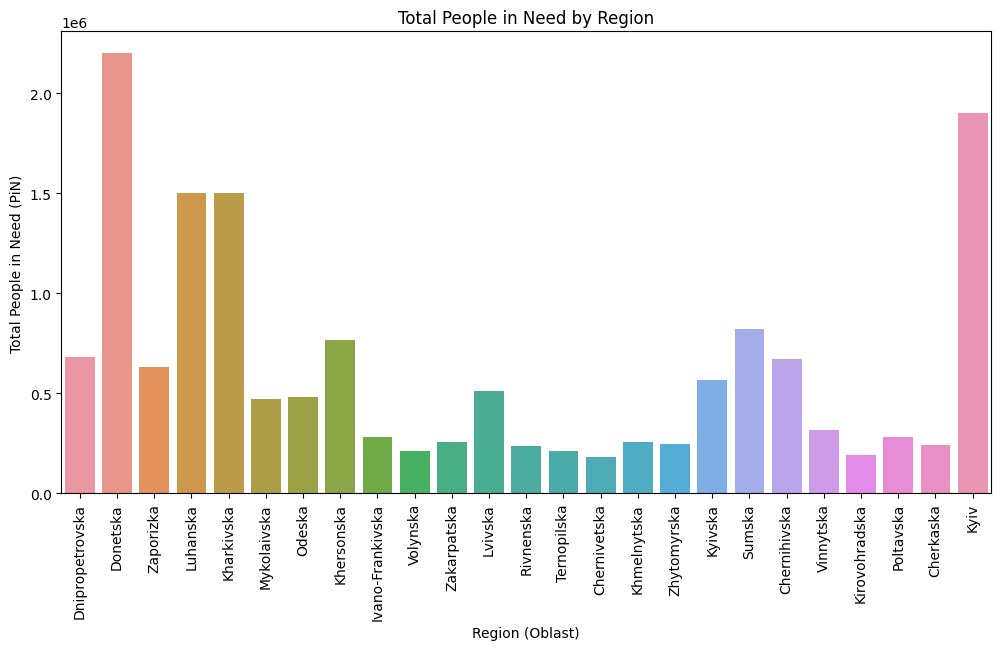

In [ ]:
# bar chart to visualize the 'Total People in Need (PiN)' for each region (Oblast).
plt.figure(figsize=(12, 6))
sns.barplot(x='Oblast', y='Total People in Need (PiN)', data=df)
plt.xticks(rotation=90)
plt.title('Total People in Need by Region')
plt.xlabel('Region (Oblast)')
plt.ylabel('Total People in Need (PiN)')
plt.show()


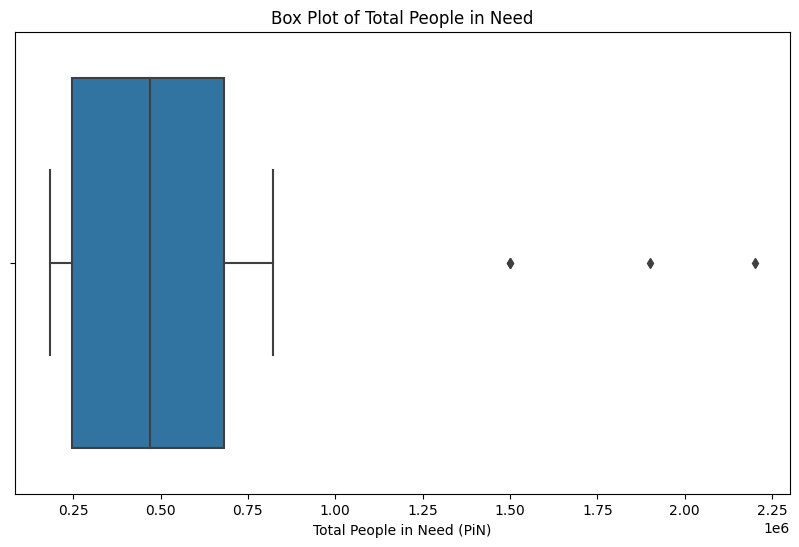

In [ ]:
# box plots to visualize the distribution and spread of 'Total People in Need (PiN)' across regions.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total People in Need (PiN)', data=df)
plt.title('Box Plot of Total People in Need')
plt.xlabel('Total People in Need (PiN)')
plt.show()


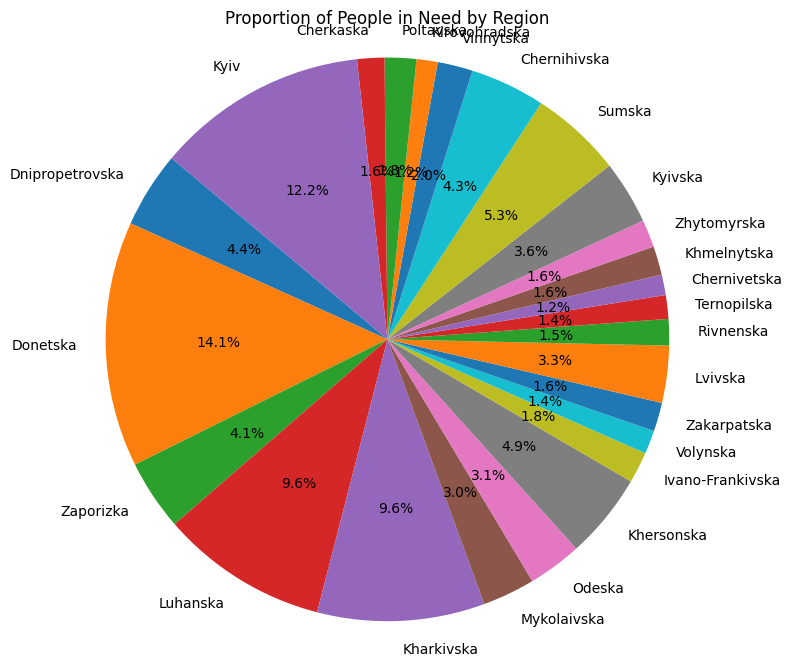

In [ ]:
# Showing the proportion of people in need by region
plt.figure(figsize=(8, 8))
plt.pie(df['Total People in Need (PiN)'], labels=df['Oblast'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of People in Need by Region')
plt.axis('equal')
plt.show()


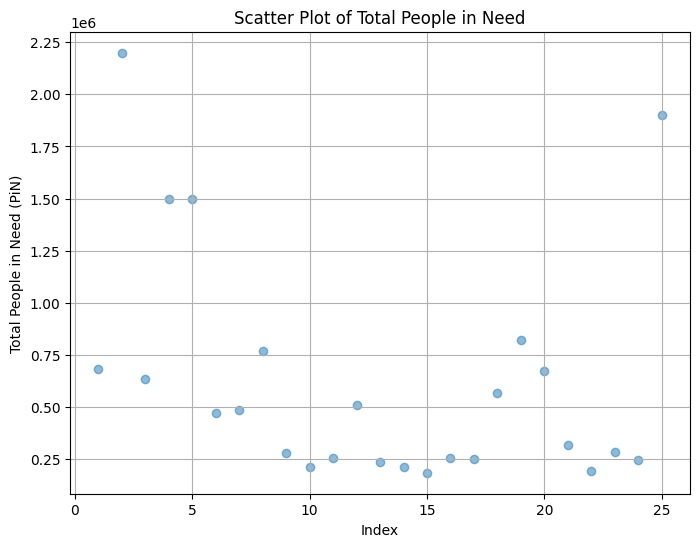

In [ ]:
# Scatter Plots, explore relationships
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Total People in Need (PiN)'], alpha=0.5)
plt.title('Scatter Plot of Total People in Need')
plt.xlabel('Index')
plt.ylabel('Total People in Need (PiN)')
plt.grid(True)
plt.show()


# Ukraine - Conflict Event

**Dataset: ukraine_hrp_political_violence_events_and_fatalities_by_month-year_as-of-06oct2023**

In [ ]:
conflict_events.head()

,Country,Admin1,Admin2,ISO3,Admin2 Pcode,Admin1 Pcode,Month,Year,Events,Fatalities
0,Ukraine,Cherkasy,Cherkaskyi,UKR,UA7108,UA71,January,2018,0,0
1,Ukraine,Cherkasy,Cherkaskyi,UKR,UA7108,UA71,January,2018,0,0
2,Ukraine,Cherkasy,Cherkaskyi,UKR,UA7108,UA71,January,2018,0,0
3,Ukraine,Cherkasy,Cherkaskyi,UKR,UA7108,UA71,January,2018,0,0
4,Ukraine,Cherkasy,Cherkaskyi,UKR,UA7108,UA71,January,2018,0,0


In [ ]:
conflict_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124880 entries, 0 to 124879
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Country       124880 non-null  object
 1   Admin1        124880 non-null  object
 2   Admin2        124740 non-null  object
 3   ISO3          124880 non-null  object
 4   Admin2 Pcode  124740 non-null  object
 5   Admin1 Pcode  124740 non-null  object
 6   Month         124880 non-null  object
 7   Year          124880 non-null  int64 
 8   Events        124880 non-null  int64 
 9   Fatalities    124880 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 9.5+ MB


In [ ]:
conflict_events = conflict_events[(conflict_events['Events'] != 0) | (conflict_events['Fatalities'] !=0)]

In [ ]:
conflict_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26550 entries, 123 to 124876
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       26550 non-null  object
 1   Admin1        26550 non-null  object
 2   Admin2        26550 non-null  object
 3   ISO3          26550 non-null  object
 4   Admin2 Pcode  26550 non-null  object
 5   Admin1 Pcode  26550 non-null  object
 6   Month         26550 non-null  object
 7   Year          26550 non-null  int64 
 8   Events        26550 non-null  int64 
 9   Fatalities    26550 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.2+ MB


In [ ]:
# confirm the frequency of conflict events in Ukraine and time
conflict_events['Year'].value_counts()

2022    9144
2023    6951
2019    3420
2018    3204
2020    2199
2021    1632
Name: Year, dtype: int64

**Explanation:** To confirm that conflict events in Ukraine and its relationships with Russian's invasion, the information provided from above can ensure conflicts mostly arises in the war between Russia and Ukraine

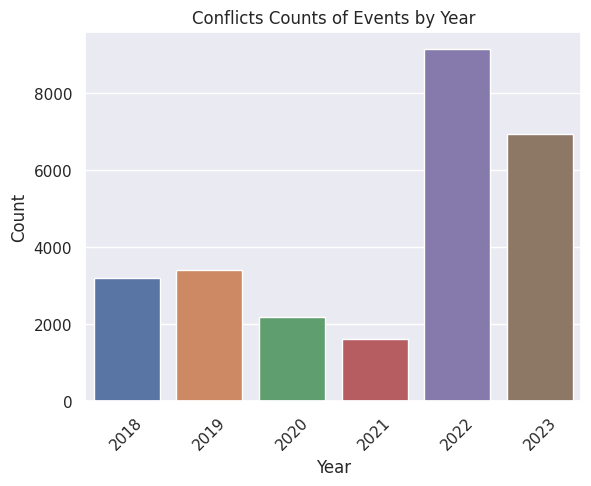

In [ ]:
sns.set(style="darkgrid")
sns.countplot(data=conflict_events, x='Year')
plt.title('Conflicts Counts of Events by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
conflict_events['Admin1'].value_counts()

Donetsk            4596
Crimea             2259
Dnipropetrovsk     1998
Zaporizhia         1779
Odesa              1739
Kharkiv            1567
Luhansk            1509
Kherson            1241
Sumy               1057
Chernihiv          1030
Mykolaiv            915
Zhytomyr            851
Lviv                777
Kyiv                713
Cherkasy            675
Poltava             557
Rivne               541
Khmelnytskyi        465
Kirovograd          455
Vinnytsia           403
Ternopil            377
Ivano-Frankivsk     332
Chernivtsi          227
Volyn               225
Zakarpattia         199
Kyiv City            63
Name: Admin1, dtype: int64

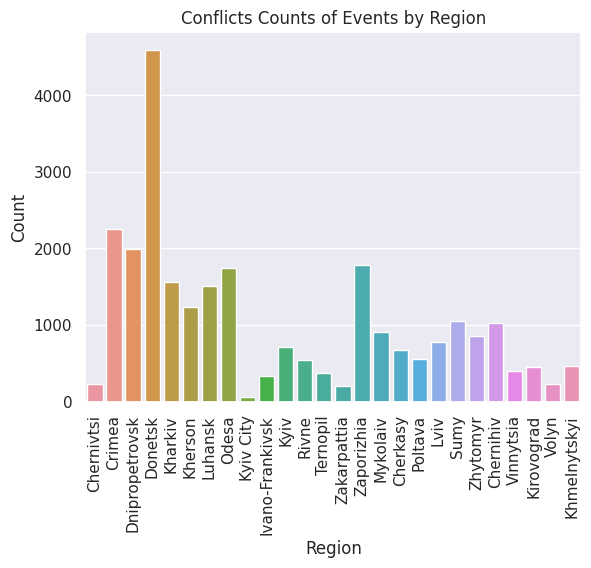

In [ ]:
sns.set(style="darkgrid")
sns.countplot(data=conflict_events, x='Admin1')
plt.title('Conflicts Counts of Events by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()